# Rainfall Prediction Using Machine Learning

In [1]:
#importing librarires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing data set
data=pd.read_csv("C:\\Users\\dell\\Desktop\\DA course\\Data files\\Rainfall.csv")

In [3]:
# show the first five rows of the data including column headers, this can help you to understand the data structure.
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-Apr,May-Jun,Jul-Aug,Sep-Oct,Nov-Dec
0,ANDAMAN & NICOBAR ISLANDS,1701,189.0,283.0,461.0,417.0,132.0,181.0,245.0,127.0,...,230.0,262.0,33.6,1049.0,241.0,131.0,457.0,161.0,498.0,208.0
1,ANDAMAN & NICOBAR ISLANDS,1702,164.0,146.0,203.0,146.0,406.0,405.0,231.0,289.0,...,129.0,357.0,160.5,1503.0,222.0,315.0,360.0,479.0,191.0,198.0
2,ANDAMAN & NICOBAR ISLANDS,1703,361.0,451.0,294.0,251.0,211.0,220.0,476.0,169.0,...,239.0,173.0,225,3732.0,276.0,427.0,224.0,457.0,104.0,145.0
3,ANDAMAN & NICOBAR ISLANDS,1704,235.0,145.0,210.0,398.0,464.0,117.0,370.0,224.0,...,349.0,148.0,40.1,1305.0,138.0,170.0,398.0,158.0,418.0,170.0
4,ANDAMAN & NICOBAR ISLANDS,1705,280.0,500.0,484.0,314.0,124.0,224.0,406.0,301.0,...,326.0,305.0,344.7,1078.0,139.0,127.0,331.0,464.0,424.0,417.0


In [4]:
#shape is used to understand their size and structure.
data.shape

(11139, 21)

In [5]:
# it use to quickly assess the structure of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11139 entries, 0 to 11138
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  11139 non-null  object 
 1   YEAR         11139 non-null  int64  
 2   JAN          11139 non-null  float64
 3   FEB          11137 non-null  float64
 4   MAR          11139 non-null  float64
 5   APR          11139 non-null  float64
 6   MAY          11139 non-null  float64
 7   JUN          11138 non-null  float64
 8   JUL          11139 non-null  float64
 9   AUG          11139 non-null  float64
 10  SEP          11139 non-null  float64
 11  OCT          11139 non-null  float64
 12  NOV          11135 non-null  float64
 13  DEC          11125 non-null  object 
 14  ANNUAL       11138 non-null  float64
 15  Jan-Feb      11139 non-null  float64
 16  Mar-Apr      11125 non-null  float64
 17  May-Jun      11124 non-null  float64
 18  Jul-Aug      11126 non-null  float64
 19  Sep-

In [6]:
# Data cleaning
data.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             0
FEB             2
MAR             0
APR             0
MAY             0
JUN             1
JUL             0
AUG             0
SEP             0
OCT             0
NOV             4
DEC            14
ANNUAL          1
Jan-Feb         0
Mar-Apr        14
May-Jun        15
Jul-Aug        13
Sep-Oct         0
Nov-Dec         3
dtype: int64

In [7]:
(data.isna().sum()/data.shape[0])*100

SUBDIVISION    0.000000
YEAR           0.000000
JAN            0.000000
FEB            0.017955
MAR            0.000000
APR            0.000000
MAY            0.000000
JUN            0.008977
JUL            0.000000
AUG            0.000000
SEP            0.000000
OCT            0.000000
NOV            0.035910
DEC            0.125685
ANNUAL         0.008977
Jan-Feb        0.000000
Mar-Apr        0.125685
May-Jun        0.134662
Jul-Aug        0.116707
Sep-Oct        0.000000
Nov-Dec        0.026932
dtype: float64

In [8]:
data.dropna(axis=0,inplace=True)

In [9]:
data.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-Apr        0
May-Jun        0
Jul-Aug        0
Sep-Oct        0
Nov-Dec        0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
# Data preprocessing
data.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC             object
ANNUAL         float64
Jan-Feb        float64
Mar-Apr        float64
May-Jun        float64
Jul-Aug        float64
Sep-Oct        float64
Nov-Dec        float64
dtype: object

In [12]:
data.DEC.unique()

array(['33.6', '160.5', '225', '40.1', '344.7', '79.2', '245.6', '196.9',
       '153.5', '*', '2.3', '67.5', '289.7', '318', '133.7', '236.9',
       '175', '258.4', '85.5', '41.5', '192.2', '70.6', '196', '560.7',
       '65.5', '13.5', '201.6', '182.7', '56.9', '46.1', '95.4', '212.2',
       '617.5', '107.5', '131.3', '325', '279.5', '243.8', '168.6', '7',
       '169.4', '434.8', '435.8', '436.8', '437.8', '438.8', '439.8',
       '440.8', '441.8', '442.8', '443.8', '444.8', '445.8', '446.8',
       '447.8', '448.8', '449.8', '450.8', '451.8', '452.8', '453.8',
       '454.8', '455.8', '456.8', '457.8', '458.8', '459.8', '460.8',
       '461.8', '462.8', '463.8', '464.8', '465.8', '466.8', '467.8',
       '468.8', '469.8', '470.8', '471.8', '472.8', '473.8', '474.8',
       '475.8', '476.8', '477.8', '478.8', '479.8', '480.8', '481.8',
       '482.8', '483.8', '484.8', '485.8', '486.8', '487.8', '488.8',
       '489.8', '490.8', '491.8', '492.8', '493.8', '494.8', '495.8',
       

In [13]:
data.loc[data['DEC']=='*']

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-Apr,May-Jun,Jul-Aug,Sep-Oct,Nov-Dec
9,ANDAMAN & NICOBAR ISLANDS,1710,459.0,348.0,325.0,343.0,254.0,409.0,478.0,405.0,...,499.0,368.0,*,2842.0,479.0,425.0,426.0,237.0,267.0,266.0
619,ARUNACHAL PRADESH,2005,85.8,119.3,363.9,495.0,398.5,811.8,608.7,332.5,...,155.8,100.2,*,3408.2,151.1,599.7,323.5,241.1,551.9,185.7
635,ASSAM & MEGHALAYA,1706,195.0,120.0,403.0,490.0,224.0,129.0,197.0,190.0,...,259.0,224.0,*,1465.0,254.0,484.0,266.0,238.0,399.0,415.0
694,ASSAM & MEGHALAYA,1765,53.0,120.0,46.0,117.0,290.0,57.0,267.0,99.0,...,243.0,278.0,*,3164.0,339.0,371.0,259.0,333.0,311.0,315.0
1931,ORISSA,1742,41.9,19.3,10.5,61.8,125.3,306.0,299.0,385.9,...,48.0,35.7,*,1482.2,61.3,1139.8,1139.8,83.6,297.3,244.2
2872,EAST UTTAR PRADESH,1738,71.4,54.9,65.6,50.1,46.5,158.4,183.2,291.4,...,56.7,46.0,*,796.5,82.3,713.3,713.3,58.8,301.4,1.1
3009,EAST UTTAR PRADESH,1875,58.4,41.9,52.6,37.1,33.5,145.4,170.2,278.4,...,43.7,33.0,*,783.5,69.3,700.3,700.3,45.8,288.4,69.7
4126,PUNJAB,1732,77.9,58.3,107.5,64.4,75.5,59.1,261.8,176.2,...,55.9,88.5,*,553.5,82.2,401.6,401.6,92.3,186.2,86.9
4736,JAMMU & KASHMIR,1712,127.7,196.9,39.4,85.9,88.0,35.5,200.0,274.5,...,21.7,9.8,*,1239.8,324.6,590.2,590.2,111.7,161.6,40.0
4752,JAMMU & KASHMIR,1728,114.3,106.3,127.6,97.1,101.6,71.8,123.9,167.6,...,30.0,32.4,*,970.0,213.6,376.8,376.8,88.3,177.6,56.0


In [14]:
data.DEC.replace('*',np.nan,inplace=True)

In [15]:
data.DEC = data.DEC.astype(float)

In [16]:
data.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-Apr        float64
May-Jun        float64
Jul-Aug        float64
Sep-Oct        float64
Nov-Dec        float64
dtype: object

In [17]:
# this function is used to generate the summary statistics of a dataset.
data.DEC.describe()

count    11065.000000
mean        35.816340
std         58.902956
min          0.000000
25%          4.300000
50%         23.100000
75%         49.000000
max        617.500000
Name: DEC, dtype: float64

In [18]:
data.DEC.fillna(data.DEC.mean(),inplace=True)

In [19]:
#it computes the the correlation between numeric columns in a dataframe,generating a correlation matrix
data.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_7920\79640700.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-Apr,May-Jun,Jul-Aug,Sep-Oct,Nov-Dec
YEAR,1.000000,-0.046372,-0.064738,0.020106,0.066669,0.039971,0.073727,0.050160,0.000085,0.041247,0.050220,-0.004273,-0.069608,0.007621,-0.045833,0.050515,0.042306,0.061709,-0.011018,0.002640
JAN,-0.046372,1.000000,0.711221,0.630261,0.418888,0.381109,-0.014650,-0.019614,0.094088,0.125351,0.257928,0.479232,0.245717,0.210268,0.700726,-0.178345,-0.183952,0.177269,0.023625,0.188593
FEB,-0.064738,0.711221,1.000000,0.661496,0.446242,0.292029,0.026803,-0.030466,0.057742,0.156970,0.227091,0.454468,0.254496,0.231709,0.679771,-0.165048,-0.169798,0.138753,0.057705,0.189063
MAR,0.020106,0.630261,0.661496,1.000000,0.660976,0.277456,0.125995,-0.002954,0.079725,0.244544,0.225118,0.401815,0.218781,0.299778,0.587828,-0.134030,-0.149348,0.140407,0.132455,0.220113
APR,0.066669,0.418888,0.446242,0.660976,1.000000,0.395264,0.414766,0.163775,0.144819,0.371894,0.447450,0.450978,0.118893,0.517058,0.410385,0.121053,0.098647,0.380182,0.190653,0.417685
MAY,0.039971,0.381109,0.292029,0.277456,0.395264,1.000000,0.295895,0.391924,0.477951,0.332207,0.461029,0.294159,0.046475,0.502194,0.246973,0.202615,0.198865,0.351885,0.157370,0.327127
JUN,0.073727,-0.014650,0.026803,0.125995,0.414766,0.295895,1.000000,0.775780,0.476435,0.565816,0.599520,0.270206,-0.017553,0.847285,-0.010433,0.786215,0.810278,0.547015,0.507529,0.532029
JUL,0.050160,-0.019614,-0.030466,-0.002954,0.163775,0.391924,0.775780,1.000000,0.665602,0.459986,0.476772,0.064106,-0.052813,0.775245,-0.079468,0.827900,0.855569,0.354985,0.552566,0.381138
AUG,0.000085,0.094088,0.057742,0.079725,0.144819,0.477951,0.476435,0.665602,1.000000,0.434184,0.310140,-0.032118,-0.056686,0.614944,0.033499,0.643458,0.670422,0.123049,0.646867,0.169656
SEP,0.041247,0.125351,0.156970,0.244544,0.371894,0.332207,0.565816,0.459986,0.434184,1.000000,0.428947,0.252478,0.021677,0.672473,0.140249,0.551507,0.559661,0.386324,0.459432,0.398661


C:\Users\dell\AppData\Local\Temp\ipykernel_7920\2229924311.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=False)


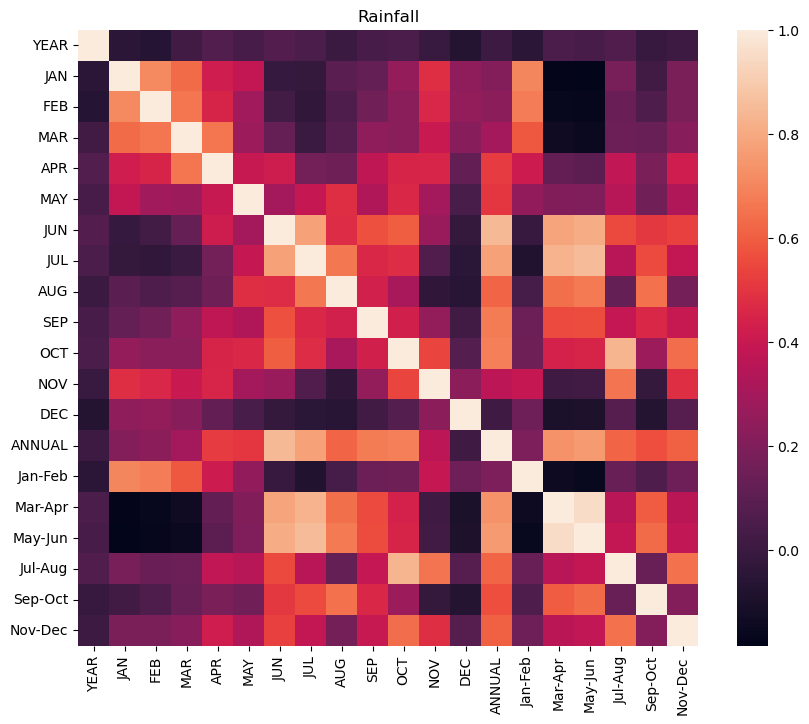

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=False)
plt.title('Rainfall')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_7920\2194222961.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.ANNUAL,color='c')


<Axes: ylabel='Density'>

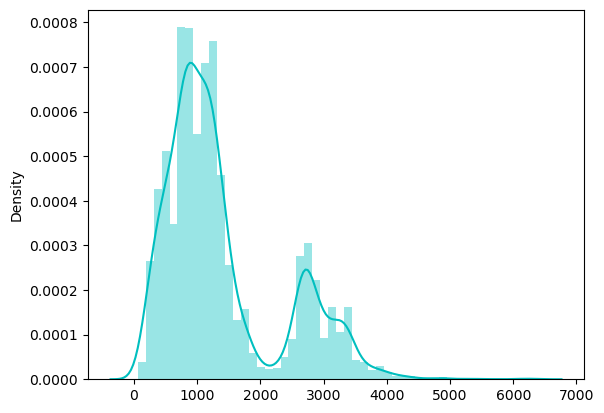

In [21]:
# It use to understand the distribution of target varaible .
#it displays a histogram along with a kernel density estimate plot, providing insights into the shape and characterstics of the 
#data's  distribution.
sns.distplot(x=data.ANNUAL,color='c')

In [22]:
data.drop(['SUBDIVISION','YEAR'],axis=1,inplace=True)

In [23]:
data.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-Apr,May-Jun,Jul-Aug,Sep-Oct,Nov-Dec
0,189.0,283.0,461.0,417.0,132.0,181.0,245.0,127.0,360.0,230.0,262.0,33.6,1049.0,241.0,131.0,457.0,161.0,498.0,208.0
1,164.0,146.0,203.0,146.0,406.0,405.0,231.0,289.0,485.0,129.0,357.0,160.5,1503.0,222.0,315.0,360.0,479.0,191.0,198.0
2,361.0,451.0,294.0,251.0,211.0,220.0,476.0,169.0,194.0,239.0,173.0,225.0,3732.0,276.0,427.0,224.0,457.0,104.0,145.0
3,235.0,145.0,210.0,398.0,464.0,117.0,370.0,224.0,301.0,349.0,148.0,40.1,1305.0,138.0,170.0,398.0,158.0,418.0,170.0
4,280.0,500.0,484.0,314.0,124.0,224.0,406.0,301.0,418.0,326.0,305.0,344.7,1078.0,139.0,127.0,331.0,464.0,424.0,417.0


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [25]:
# split data into input and target variables
x=data.drop(['ANNUAL'],axis=1)
y=data['ANNUAL']

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
# before we create a model we need to standardize our independent features by using the standardscaler method from scikit-learn
#standardize the dataset

scaler=StandardScaler()

# Scale values of all variables to same scale
# This helps in increasing performance of algorithm
x_scaled=scaler.fit_transform(x)

In [28]:
# It refers to scaled and preprocessed feature values
x_scaled[0]

array([ 2.19732112,  3.67208574,  5.5605983 ,  3.67203144,  0.17222746,
       -0.24115106, -0.38910963, -0.8543428 ,  1.52038891,  1.06821975,
        2.45521358, -0.03765077,  2.15066018, -1.15435042, -0.71567815,
       -0.06057586,  1.39198564,  0.74833058])

In [29]:
 # it is used to select a specific  row or column from data set.
data.iloc[0]

JAN         189.0
FEB         283.0
MAR         461.0
APR         417.0
MAY         132.0
JUN         181.0
JUL         245.0
AUG         127.0
SEP         360.0
OCT         230.0
NOV         262.0
DEC          33.6
ANNUAL     1049.0
Jan-Feb     241.0
Mar-Apr     131.0
May-Jun     457.0
Jul-Aug     161.0
Sep-Oct     498.0
Nov-Dec     208.0
Name: 0, dtype: float64

In [30]:
x.columns

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC', 'Jan-Feb', 'Mar-Apr', 'May-Jun', 'Jul-Aug', 'Sep-Oct',
       'Nov-Dec'],
      dtype='object')

In [31]:
y.head()

0    1049.0
1    1503.0
2    3732.0
3    1305.0
4    1078.0
Name: ANNUAL, dtype: float64

In [32]:
# split into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=41)

In [33]:
x_train.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Jan-Feb,Mar-Apr,May-Jun,Jul-Aug,Sep-Oct,Nov-Dec
3983,7.6,0.7,48.0,0.5,29.3,34.3,109.7,162.9,102.3,1.5,10.4,69.2,8.3,409.3,409.3,32.3,100.0,2.8
4264,29.9,10.3,59.5,16.4,27.5,11.1,213.8,128.2,18.5,7.9,40.5,41.1,34.2,353.6,353.6,44.3,138.2,33.9
7813,42.6,38.6,79.9,52.6,49.1,174.8,386.8,356.6,161.1,119.5,38.6,14.4,43.2,965.4,965.4,120.1,366.6,145.5
5039,171.3,163.3,184.6,154.1,158.6,128.8,180.9,224.6,91.4,87.0,89.4,8.7,270.6,433.8,433.8,145.3,156.6,0.0
7637,27.4,27.0,33.2,37.6,38.2,186.5,298.0,128.3,116.3,105.4,30.5,52.6,27.4,648.1,648.1,108.9,138.3,131.4


In [34]:
x_train.shape

(8862, 18)

In [35]:
x_test.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Jan-Feb,Mar-Apr,May-Jun,Jul-Aug,Sep-Oct,Nov-Dec
3518,40.0,5.2,78.3,13.6,61.1,180.1,449.6,417.2,174.1,6.3,35.6,50.6,45.2,1221.0,1221.0,72.9,377.8,21.6
2096,0.1,16.9,57.4,105.1,39.8,226.3,203.9,531.8,204.8,15.9,14.0,16.9,17.0,1166.8,1166.8,61.1,319.4,138.1
4824,367.8,96.1,115.4,119.3,55.5,20.9,182.2,175.6,371.1,12.8,0.7,0.1,463.9,749.8,749.8,19.2,169.6,48.0
11053,14.0,24.6,14.2,0.0,110.6,277.5,115.5,186.4,193.0,170.6,79.6,72.4,38.6,244.2,772.4,322.6,242.0,261.8
9933,0.0,6.0,2.6,16.0,51.2,99.6,60.1,139.2,42.2,85.0,4.4,0.0,6.0,341.1,341.1,89.4,57.8,51.7


In [36]:
x_test.shape

(2216, 18)

In [37]:
y_train.head()

3983     527.8
4264     505.5
7813    1120.3
5039    1027.0
7637     758.4
Name: ANNUAL, dtype: float64

In [38]:
y_train.shape

(8862,)

In [39]:
y_test.head()

3518     1492.0
2096     1447.1
4824     1523.1
11053    1258.4
9933      506.2
Name: ANNUAL, dtype: float64

In [40]:
y_test.shape

(2216,)

# Linear Regression

In [41]:
lr=LinearRegression()

In [42]:
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
pred=lr.predict(x_test)

In [44]:
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix

In [45]:
#it refers to the coefficient values associated with the features in a linear regression model.
lr.coef_

array([-0.17663393,  1.25049863,  0.75181124,  0.96374193,  0.41742981,
        0.95683612,  0.63860627,  0.6255685 ,  0.92680516, -0.41724976,
       -0.62072573, -0.35233121,  0.58205405,  0.02375604,  0.16029401,
        1.2357342 ,  0.19049255,  0.65247071])

In [46]:
# it refers to intercept or bias term of a linear regression model
lr.intercept_

-72.80454387382679

In [47]:
print(mean_squared_error(y_test,pred))

94004.16449331945


In [48]:
print(r2_score(y_test,pred))

0.8953772274638965


<Axes: xlabel='ANNUAL'>

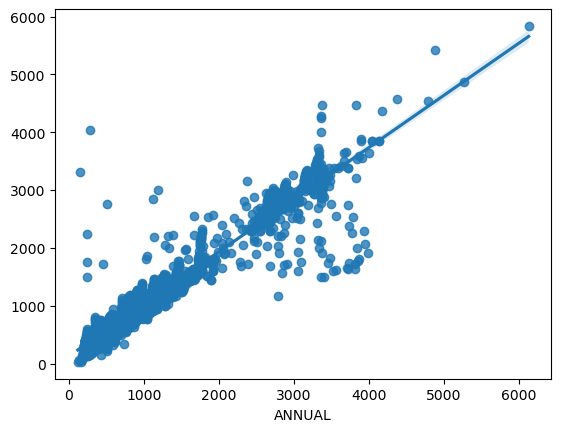

In [49]:
sns.regplot(x=y_test,y=pred)  #regplot method is used to plot data and draw a linear regression model fit.

In [50]:
lr.predict([[200,200,203,40,38,30,25,28,28,85,36,78,95,34,67,78,356,32]])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([603.76481576])

In [51]:
pred1=lr.predict(x_test)

In [52]:
print(r2_score(y_test,pred1))

0.8953772274638965


# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
# create the Regressor
# now is time to create our random forest Regressor and then train it on the train set.
# we will also pass the number of trees(100) in the forest we want to use through the parameter called n_estimators.
rf=RandomForestRegressor(n_estimators=100)

In [55]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
pred2=rf.predict(x_test)

In [57]:
print(mean_squared_error(y_test,pred2))

40942.52487537682


In [58]:
print(r2_score(y_test,pred2))

0.9544326521045275


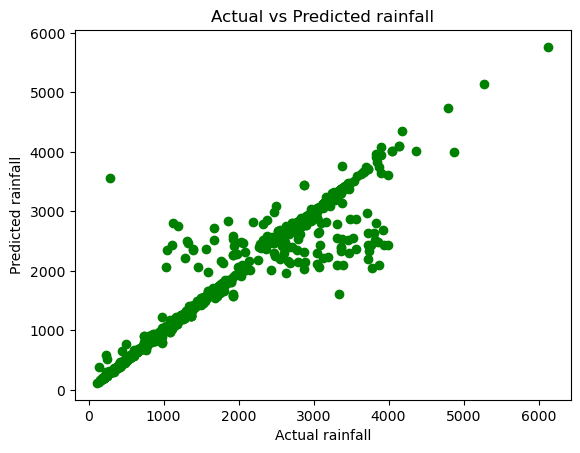

In [59]:
plt.scatter(y_test,pred2,color='g')
plt.xlabel("Actual rainfall")
plt.ylabel("Predicted rainfall")
plt.title("Actual vs Predicted rainfall")
plt.show()

In [60]:
#we can also check the important features by using feature_importance
# check important feature
feature_importances_Data=pd.DataFrame({"feature":list(x.columns),
                                       "importance":rf.feature_importances_}).sort_values("importance",ascending=False)
# Display 
feature_importances_Data

,feature,importance
5,JUN,0.682117
14,May-Jun,0.088463
4,MAY,0.042865
12,Jan-Feb,0.036023
8,SEP,0.021761
0,JAN,0.017832
1,FEB,0.017617
17,Nov-Dec,0.015048
15,Jul-Aug,0.013741
13,Mar-Apr,0.012099


# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
dtree=DecisionTreeRegressor(random_state=42)

In [63]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [64]:
pred3=dtree.predict(x_test)

In [65]:
dtree.score(x_train,y_train)  #training accuracy

1.0

In [66]:
dtree.score(x_test,y_test)  #testing accuracy

0.9242494487671016

In [67]:
print(mean_squared_error(y_test,pred1))

94004.16449331945


In [68]:
print(r2_score(y_test,pred1))

0.8953772274638965


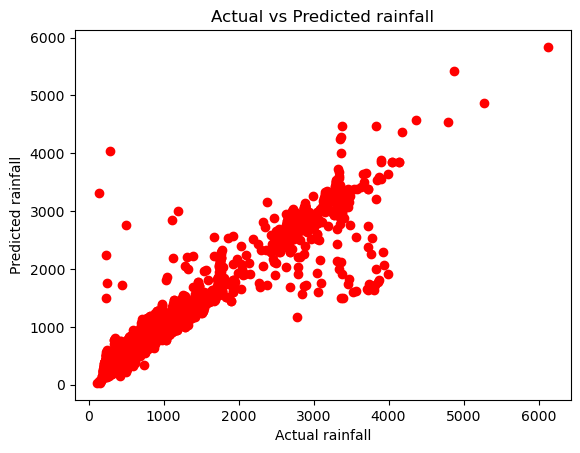

In [69]:
plt.scatter(y_test,pred1,color='r')
plt.xlabel("Actual rainfall")
plt.ylabel("Predicted rainfall")
plt.title("Actual vs Predicted rainfall")
plt.show()